In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

## Data Loading

In [10]:
coordinates = pd.read_csv('locations(2).csv')
incidence = pd.read_csv('incidence_matrix(2).csv')

### Coordinates

In [11]:
coordinates.rename(columns = {"Unnamed: 0" : "label"}, inplace = True)

In [12]:
coordinates

,label,x,y
0,c1,-7,-10
1,c4,10,-10
2,c8,-4,-7
3,c11,3,-7
4,c12,6,-7
5,c13,-1,-6
6,c16,-8,-3
7,c17,4,-3
8,c21,-3,-2
9,c23,4,-2


### Incidence matrix

In [13]:
incidence_np = incidence.drop(":", axis = 1)
incidence_np['d1'].replace({1: 0}, inplace = True)

In [14]:
G = nx.DiGraph(incidence_np.values)

In [15]:
ordered_nodes = [incidence_np.columns[i] for i in nx.topological_sort(G)]

In [16]:
ordered_nodes = pd.DataFrame(ordered_nodes)

ordered_nodes['order'] = ordered_nodes.reset_index()['index']

In [17]:
ordered_nodes.rename(columns = {0 : "label"}, inplace = True)

In [18]:
ordered_nodes

,label,order
0,d1,0
1,c40,1
2,c36,2
3,c35,3
4,c24,4
5,c23,5
6,c17,6
7,c12,7
8,c4,8
9,c11,9


### Merge

In [19]:
to_plot = pd.merge(coordinates, ordered_nodes, on='label')

In [20]:
to_plot = to_plot.sort_values("order")

In [21]:
to_plot

,label,x,y,order
25,d1,10,10,0
16,c40,8,4,1
14,c36,10,1,2
13,c35,8,1,3
10,c24,6,-2,4
9,c23,4,-2,5
7,c17,4,-3,6
4,c12,6,-7,7
1,c4,10,-10,8
3,c11,3,-7,9


In [22]:
d1_return = {'label': 'd1', 'x': 10, 'y': 10, 'order' : len(to_plot)+1}

In [23]:
to_plot = to_plot.append(d1_return, ignore_index=True)

In [27]:
to_plot.to_csv("precise_path(2).csv")

## Plotting

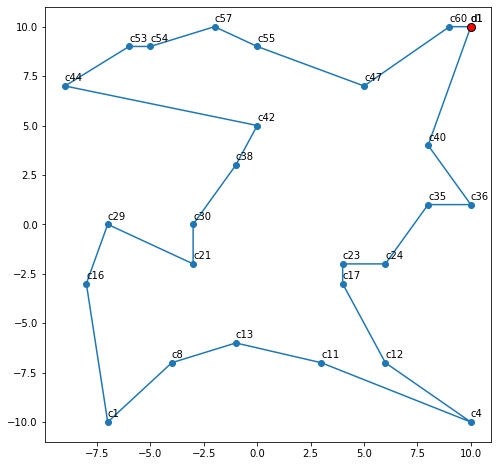

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(to_plot.x, to_plot.y, "-o")
ax.plot(to_plot["x"][0], to_plot["y"][0], marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

for i, label in enumerate(to_plot['label']):
    ax.text(to_plot['x'][i], to_plot['y'][i] +0.25, label)
    
plt.savefig('path_2.jpg')